In [1]:
from sklearn.datasets import load_iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
X = dataset['data']
y = dataset['target']

## Exploratory Data Analysis

In [6]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
dict_label = {0:'setosa', 1:'versicolor', 2:'virginica'}
df['labels'] = dataset['target']
df['labels'] = df['labels'].map(dict_label)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['labels'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: labels, dtype: int64

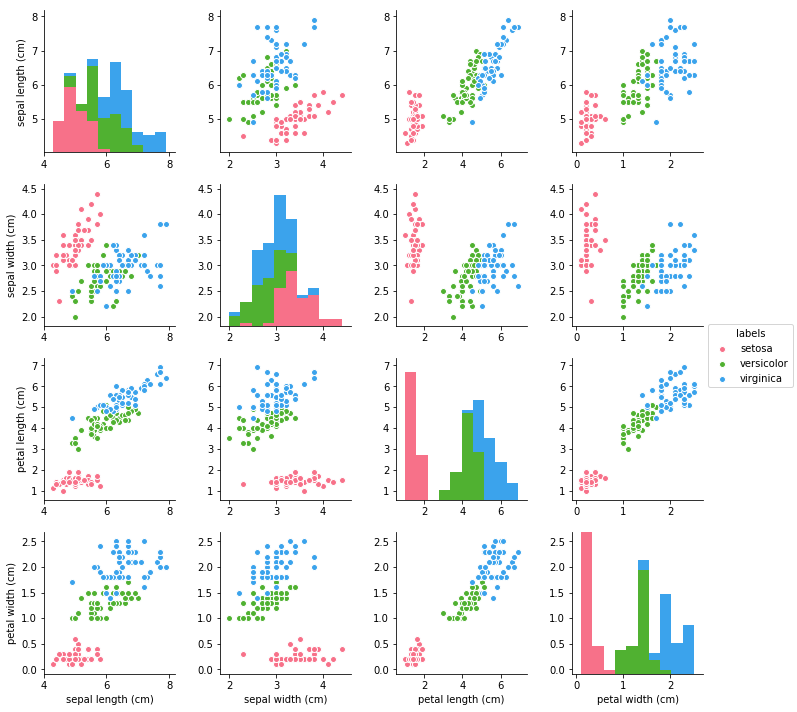

In [8]:
sns.pairplot(df,hue='labels',palette='husl')

## Machine Learning

In [9]:
knn = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred)*100,'%')

95.55555555555556 %


In [13]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.87      0.93        15
          2       0.88      1.00      0.94        15

avg / total       0.96      0.96      0.96        45

